# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
#     df.to_csv('pca-dataset.csv', index=False)
    return df
    
df = generate_data()

In [2]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
# scaling train data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [7]:
# applying PCA
pca = PCA()
pca.fit(X_train_scaled)

PCA()

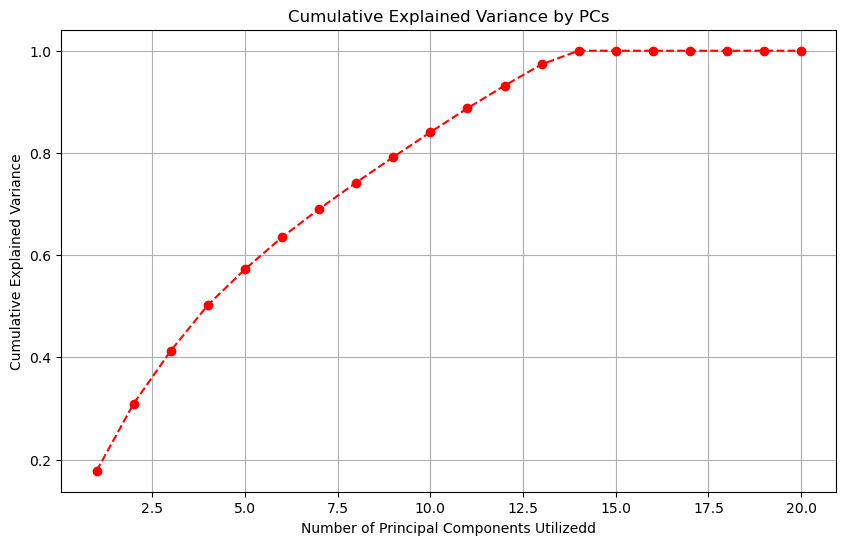

In [8]:
# getting cumulative sum of explained variance ratio for PCs
cumulative_sum = pca.explained_variance_ratio_.cumsum()

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_sum, marker='o', color='red', linestyle='--')
plt.title('Cumulative Explained Variance by PCs')
plt.xlabel('Number of Principal Components Utilizedd')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


> If we look here, we have a total of 20 PCs (as we have 20 variables), and the cumulative explained variance after 13th PCs is almost negligible. So, I would choose top 13 PCs to reduce my data as those explain 99.99% of the total variance (rest could be the noise).

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [9]:
# Insert code here
y_training.value_counts() / y_training.shape[0] * 100

target
0.0    49.250000
2.0    25.583333
1.0    25.166667
Name: count, dtype: float64

> The target is imbalanced. That much is clear. The majority class stands at 50% of the distribution whereas other 2 are fairly balanced. So, accuracy is not going to be the right choice. If model gets class 0 and 1 correct but 2 wrong then, it would still give 75% accuracy whereas we may need to focus on each individual class and decide whether FP or FN for each class is more important to reduce. If my goal is to reduce FPs, I would focus on precision. If it were to reduce FNs, I would focus on recall. If I want a balanced appraoch, I would go ahead with F1 score.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [16]:
def print_metrics(y_true, y_pred, case):
    # get accuracy, precision and recall scores
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f'======= Metrics for {case} ========')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('===================================\n')

In [17]:
# pipeline with a logistic regression model
pipeline = Pipeline([
    ('logistic', LogisticRegression(random_state=42))
])

# fitting the pipeling and making predictions
pipeline.fit(X_train, y_training)
y_pred = pipeline.predict(X_test)

# getting performance metrics on training and test predictions
train_preds = pipeline.predict(X_train)
print_metrics(y_training, train_preds, 'Training set')
print_metrics(y_test, y_pred, 'Test set')

======= Metrics for Training set ========
Accuracy: 0.7258
Precision: 0.7248
Recall: 0.7258
F1 Score: 0.7233

======= Metrics for Test set ========
Accuracy: 0.7033
Precision: 0.7040
Recall: 0.7033
F1 Score: 0.7027



> The accuracy of the model is ~70% and similar scores for precision score. I have not done EDA to know if the data is linear or non-linear. But, this is an okay performance given that we have 3 classes and F1 score is similar between training and test sets. 

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [18]:
# pipeline to scale, apply PCA and fit a logistic reg model
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ('pca', PCA(n_components=13)),
    ('logistic', LogisticRegression(random_state=42))
])

# fitting the pipeling and making predictions
pipeline.fit(X_train, y_training)
y_pred = pipeline.predict(X_test)

# fitting the pipeling and making predictions
pipeline.fit(X_train, y_training)
y_pred = pipeline.predict(X_test)

# getting performance metrics on training and test predictions
train_preds = pipeline.predict(X_train)
print_metrics(y_training, train_preds, 'Training set')
print_metrics(y_test, y_pred, 'Test set')

======= Metrics for Training set ========
Accuracy: 0.7300
Precision: 0.7285
Recall: 0.7300
F1 Score: 0.7272

======= Metrics for Test set ========
Accuracy: 0.7100
Precision: 0.7091
Recall: 0.7100
F1 Score: 0.7087



> Using PCA slightly increased accuracy and other metrics. But, the gain was not that significant. Perhaps there is some non-linearity in the model. Lets check that out with a descision tree model. If the descison tree performs wildly better than LR model, then there definately is some non-linearity.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [19]:
from sklearn.tree import DecisionTreeClassifier

# pipeline with a logistic regression model
pipeline = Pipeline([
    ('tree', DecisionTreeClassifier(random_state=42, max_depth=5))
])

# fitting the pipeling and making predictions
pipeline.fit(X_train, y_training)
y_pred = pipeline.predict(X_test)

# getting performance metrics on training and test predictions
train_preds = pipeline.predict(X_train)
print_metrics(y_training, train_preds, 'Training set')
print_metrics(y_test, y_pred, 'Test set')

======= Metrics for Training set ========
Accuracy: 0.8233
Precision: 0.8282
Recall: 0.8233
F1 Score: 0.8213

======= Metrics for Test set ========
Accuracy: 0.7067
Precision: 0.7046
Recall: 0.7067
F1 Score: 0.7051



> The training performance is very high for this model, and increasing the complexity of this model (max_depth) leads to overfitting. The test accuracy is actually less than the LR model. Maybe data is linear and other is noise as a tree model is quickly overfitting on the data.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [20]:
# pipeline with a descision tree model but with PCA applied
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ('pca', PCA(n_components=13)),
    ('tree', DecisionTreeClassifier(random_state=42, max_depth=6))
])

# fitting the pipeling and making predictions
pipeline.fit(X_train, y_training)
y_pred = pipeline.predict(X_test)

# getting performance metrics on training and test predictions
train_preds = pipeline.predict(X_train)
print_metrics(y_training, train_preds, 'Training set')
print_metrics(y_test, y_pred, 'Test set')

======= Metrics for Training set ========
Accuracy: 0.8017
Precision: 0.8001
Recall: 0.8017
F1 Score: 0.7987

======= Metrics for Test set ========
Accuracy: 0.6633
Precision: 0.6621
Recall: 0.6633
F1 Score: 0.6626



Hmm.. performance actually is down when using PCA. Perhaps, the tree model was actually fitting on the noise. That definately could be the case. Regardless, LR model wins this race. 